- looking at the test() function in deep speech, the csv file for test contains table of wav file location and true transcript of the wav files.

- commands from deepspeech:
-- deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio alexa\anfcucv
o\1.wav
-- C:\Users\aphri\pycharm\repo\DeepSpeech>deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio audio/2830-39
80-0043.wav
-- C:\Users\aphri\pycharm\repo\DeepSpeech>deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio alexa\bfeciyu
h\2.wav


In [31]:
import tensorflow as tf
from tensorflow.python.ops import gen_audio_ops as contrib_audio
import matplotlib.pyplot as plot

In [ ]:
def wav_to_audio(
    wav_filename,
):
    samples = tf.io.read_file(wav_filename)
    decoded = contrib_audio.decode_wav(samples, desired_channels=1)
    
    audio = decoded.audio # equivalent to frames converted to int16
    sample_rate = int(decoded.sample_rate)
    
    return audio, sample_rate


def wav_to_spectrogram(
    audio,
    sample_rate,
    feature_win_len=32, # feature extraction audio window length in milliseconds
    feature_win_step=20 # feature extraction window step length in milliseconds
):
    audio_window_samples = sample_rate * (feature_win_len / 1000)
    audio_step_samples = sample_rate * (feature_win_step / 1000)
    
    spectrogram = contrib_audio.audio_spectrogram(
        audio,
        window_size=audio_window_samples,
        stride=audio_step_samples,
        magnitude_squared=True
    )
    
    return spectrogram, sample_rate


def spectrogram_to_features(
    spectrogram,
    sample_rate,
    n_input=26, # Number of MFCC features, can be determined from sample rate
):
    features = contrib_audio.mfcc(
        spectrogram=spectrogram,
        sample_rate=sample_rate,
        dct_coefficient_count=n_input,
        upper_frequency_limit=sample_rate / 2
    )
    features = tf.reshape(features, [-1, n_input])
    
    return features


def wav_to_features(
    wav_filename,
    feature_win_len=32,
    feature_win_step=20,
    n_input=26,
):
    audio, sample_rate = wav_to_audio(wav_filename)
    
    spectrogram, sample_rate = wav_to_spectrogram(
        audio=audio,
        sample_rate=sample_rate,
        feature_win_len=feature_win_len,
        feature_win_step=feature_win_step,
    )
    
    features = spectrogram_to_features(
        spectrogram=spectrogram,
        sample_rate=sample_rate,
        n_input=n_input,
    )
    
    return features, spectrogram, audio

In [23]:
wav_filename = "data/alexa0001.wav"

In [57]:
features, spectrogram, audio = wav_to_features(wav_filename)

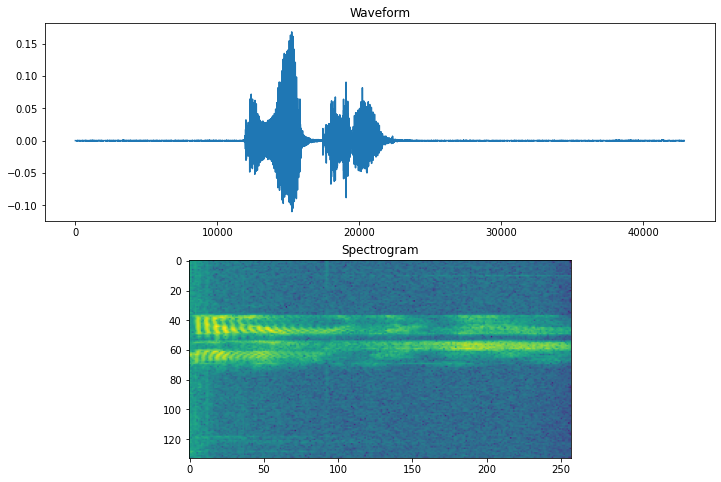

In [58]:
fig, axes = plot.subplots(2, figsize=(12, 8))
axes[0].plot(audio)
axes[0].set_title('Waveform')

axes[1].imshow(tf.math.log(spectrogram.numpy()[0]).numpy())
axes[1].set_title('Spectrogram')
plot.show()